<a href="https://colab.research.google.com/github/Julfikar-Asif/BDSET-AI-COURSE/blob/main/Assignment_0005_Pandas%2C_NumPy_%26_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Task 1
df = pd.read_csv('/content/sales_data.csv')


In [17]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price']
print("\nDataframe with Total sales: ")
print(df)
print(f"\nData types: \n{df.dtypes}")


Dataframe with Total sales: 
        Date Product Region  Units_Sold  Unit_Price  Total_Sales
0 2024-01-01       A  North         120          50         6000
1 2024-01-02       B  South          80          60         4800
2 2024-01-03       A   East         150          50         7500
3 2024-01-04       C   West         200          40         8000
4 2024-01-05       B  North          90          60         5400
5 2024-01-06       A  South         110          50         5500
6 2024-01-07       C   East         170          40         6800
7 2024-01-08       B   West         130          60         7800
8 2024-01-09       A  North         160          50         8000
9        NaT       C  South         140          40         5600

Data types: 
Date           datetime64[ns]
Product                object
Region                 object
Units_Sold              int64
Unit_Price              int64
Total_Sales             int64
dtype: object


In [20]:
# TASK 2: NumPy Operations
units_sold_array = df['Units_Sold'].to_numpy()
mean_units = np.mean(units_sold_array)
max_units = np.max(units_sold_array)
std_units = np.std(units_sold_array)

print(f"\nMean units sold: {mean_units:.2f}")
print(f"Maximum units sold: {max_units}")
print(f"Standard deviation: {std_units:.2f}")

normalized_units = (units_sold_array - np.min(units_sold_array)) / (np.max(units_sold_array) - np.min(units_sold_array))
print(f"\nNormalized Units_Sold:\n{normalized_units}")


Mean units sold: 135.00
Maximum units sold: 200
Standard deviation: 35.00

Normalized Units_Sold:
[0.33333333 0.         0.58333333 1.         0.08333333 0.25
 0.75       0.41666667 0.66666667 0.5       ]


In [21]:
#Task 4

total_sales_by_product = df.groupby('Product')['Total_Sales'].sum()
print("\nTotal Sales by Product:")
print(total_sales_by_product)

avg_units_by_region = df.groupby('Region')['Units_Sold'].mean()
print("\nAverage Units Sold by Region:")
print(avg_units_by_region)

top_3_days = df.nlargest(3, 'Total_Sales')[['Date', 'Product', 'Region', 'Total_Sales']]
print("\nTop 3 Days with Highest Total Sales:")
print(top_3_days)

filtered_data = df[(df['Region'] == 'North') & (df['Units_Sold'] > 100)]
print("\nFiltered Records (Region=North AND Units_Sold>100):")
print(filtered_data)


Total Sales by Product:
Product
A    27000
B    18000
C    20400
Name: Total_Sales, dtype: int64

Average Units Sold by Region:
Region
East     160.000000
North    123.333333
South    110.000000
West     165.000000
Name: Units_Sold, dtype: float64

Top 3 Days with Highest Total Sales:
        Date Product Region  Total_Sales
3 2024-01-04       C   West         8000
8 2024-01-09       A  North         8000
7 2024-01-08       B   West         7800

Filtered Records (Region=North AND Units_Sold>100):
        Date Product Region  Units_Sold  Unit_Price  Total_Sales
0 2024-01-01       A  North         120          50         6000
8 2024-01-09       A  North         160          50         8000


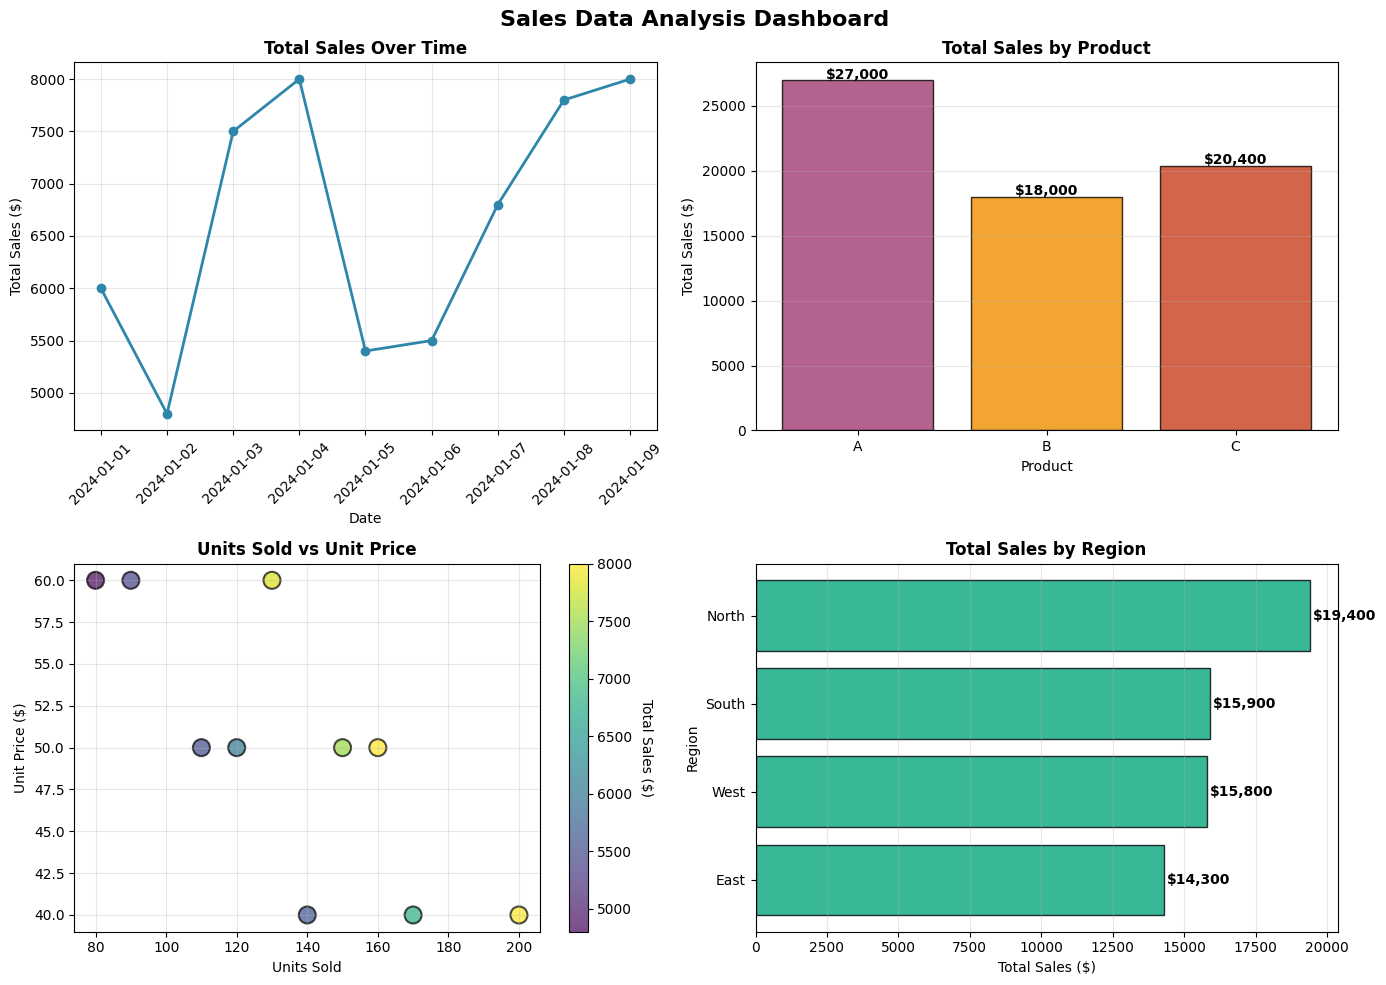

In [22]:
# TASK 4

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Sales Data Analysis Dashboard', fontsize=16, fontweight='bold')
axes[0, 0].plot(df['Date'], df['Total_Sales'], marker='o', linewidth=2, markersize=6, color='#2E86AB')
axes[0, 0].set_title('Total Sales Over Time', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Total Sales ($)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

products = total_sales_by_product.index
sales = total_sales_by_product.values
colors = ['#A23B72', '#F18F01', '#C73E1D']
axes[0, 1].bar(products, sales, color=colors, alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Total Sales by Product', fontweight='bold')
axes[0, 1].set_xlabel('Product')
axes[0, 1].set_ylabel('Total Sales ($)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(sales):
    axes[0, 1].text(i, v + 100, f'${v:,.0f}', ha='center', fontweight='bold')

scatter = axes[1, 0].scatter(df['Units_Sold'], df['Unit_Price'],
                            c=df['Total_Sales'], cmap='viridis',
                            s=150, alpha=0.7, edgecolors='black', linewidth=1.5)
axes[1, 0].set_title('Units Sold vs Unit Price', fontweight='bold')
axes[1, 0].set_xlabel('Units Sold')
axes[1, 0].set_ylabel('Unit Price ($)')
axes[1, 0].grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=axes[1, 0])
cbar.set_label('Total Sales ($)', rotation=270, labelpad=15)

sales_by_region = df.groupby('Region')['Total_Sales'].sum().sort_values(ascending=True)
axes[1, 1].barh(sales_by_region.index, sales_by_region.values,
                color='#06A77D', alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Total Sales by Region', fontweight='bold')
axes[1, 1].set_xlabel('Total Sales ($)')
axes[1, 1].set_ylabel('Region')
axes[1, 1].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(sales_by_region.values):
    axes[1, 1].text(v + 100, i, f'${v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

